# Telecom customer plan purchase prediction

## Import Libraries

In [37]:
#Importing the required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,auc
from keras.models import Sequential   # initilizing the ann model
from keras.layers import Dense   # creating hidden layers
from keras import initializers

from tensorflow.keras.callbacks import EarlyStopping   # to stop early ephocs
from tensorflow.keras.layers import Dropout   # reduce hidden layers
from sklearn.metrics import classification_report   # accuracy, recall, presion and f1 score
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
# reading csv file
df = pd.read_csv("Telecom.csv")
df

,CustomerID,PlanTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersons,NumberOfFollowups,PlanPitched,PreferredServiceStar,MaritalStatus,NumberOfUpgrades,iPhone,PitchSatisfactionScore,PhoneContract,NumberOfChildren,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


## Exploratory Data Analysis

In [3]:
# Displaing the shape of the dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (4888, 20)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              4888 non-null   int64  
 1   PlanTaken               4888 non-null   int64  
 2   Age                     4662 non-null   float64
 3   TypeofContact           4863 non-null   object 
 4   CityTier                4888 non-null   int64  
 5   DurationOfPitch         4637 non-null   float64
 6   Occupation              4888 non-null   object 
 7   Gender                  4888 non-null   object 
 8   NumberOfPersons         4888 non-null   int64  
 9   NumberOfFollowups       4843 non-null   float64
 10  PlanPitched             4888 non-null   object 
 11  PreferredServiceStar    4862 non-null   float64
 12  MaritalStatus           4888 non-null   object 
 13  NumberOfUpgrades        4748 non-null   float64
 14  iPhone                  4888 non-null   

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
PlanTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersons,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredServiceStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfUpgrades,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
iPhone,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


## Univariate Analysis

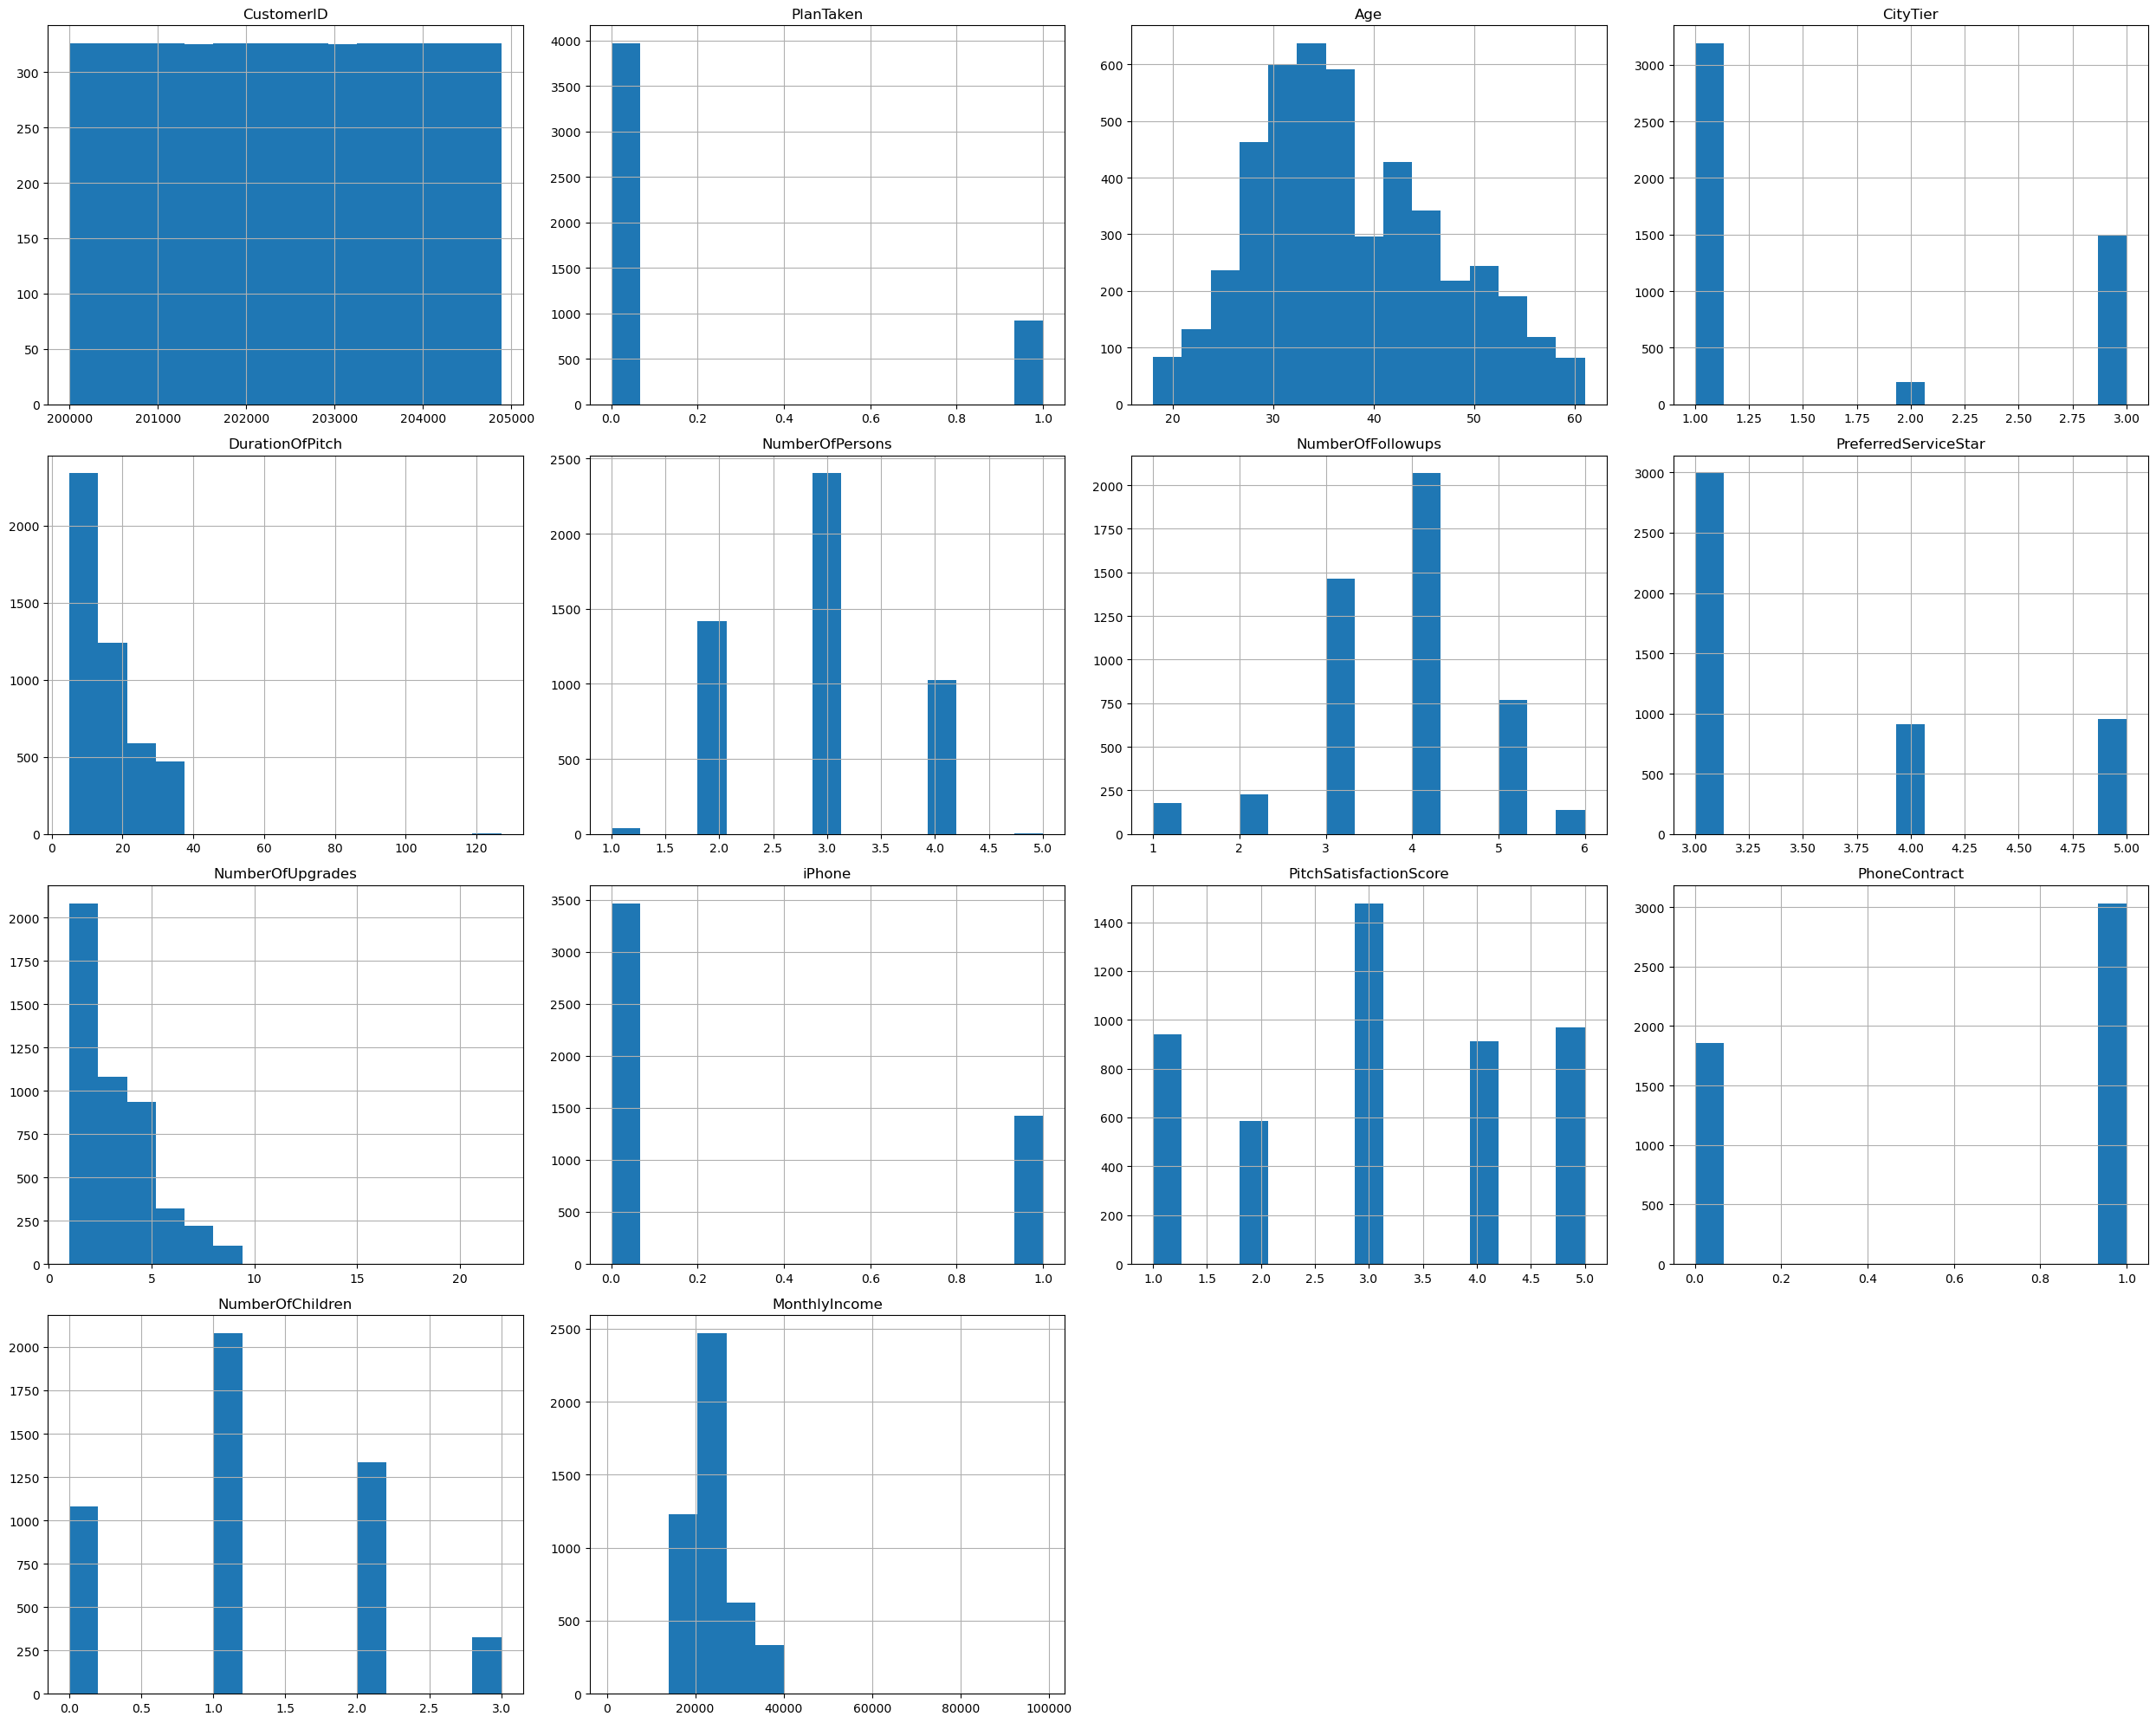

In [6]:
# Plotting histograms for numerical features
df.hist(bins=15, figsize=(25, 20))
plt.tight_layout()
plt.show()

In [7]:
# Checking for null values
df.isna().sum().sort_values()

CustomerID                  0
PlanTaken                   0
PhoneContract               0
CityTier                    0
PitchSatisfactionScore      0
Occupation                  0
Gender                      0
NumberOfPersons             0
Designation                 0
PlanPitched                 0
MaritalStatus               0
iPhone                      0
TypeofContact              25
PreferredServiceStar       26
NumberOfFollowups          45
NumberOfChildren           66
NumberOfUpgrades          140
Age                       226
MonthlyIncome             233
DurationOfPitch           251
dtype: int64

## Histogram and Boxplot distribution Visualization

In [8]:
# Defining the columns with missing values:
columns_with_missing_values = ['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredServiceStar', 'NumberOfUpgrades', 'NumberOfChildren', 'MonthlyIncome']

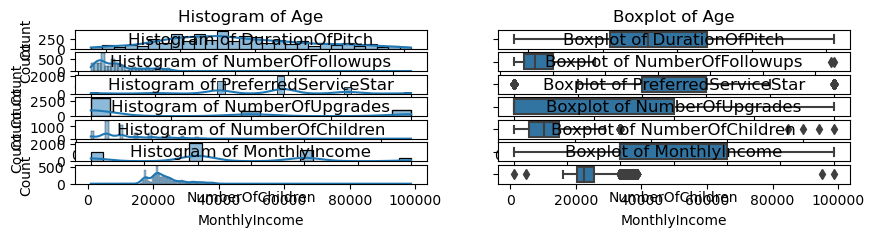

In [9]:
# Plotting histograms and boxplots for the columns to analyze the distributions:
fig, axes = plt.subplots(len(columns_with_missing_values), 2, figsize=(10, 2))

for i, col in enumerate(columns_with_missing_values):
    # Histogram
    sns.histplot(df[col], ax=axes[i][0], kde=True)
    axes[i][0].set_title(f'Histogram of {col}')

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i][1])
    axes[i][1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

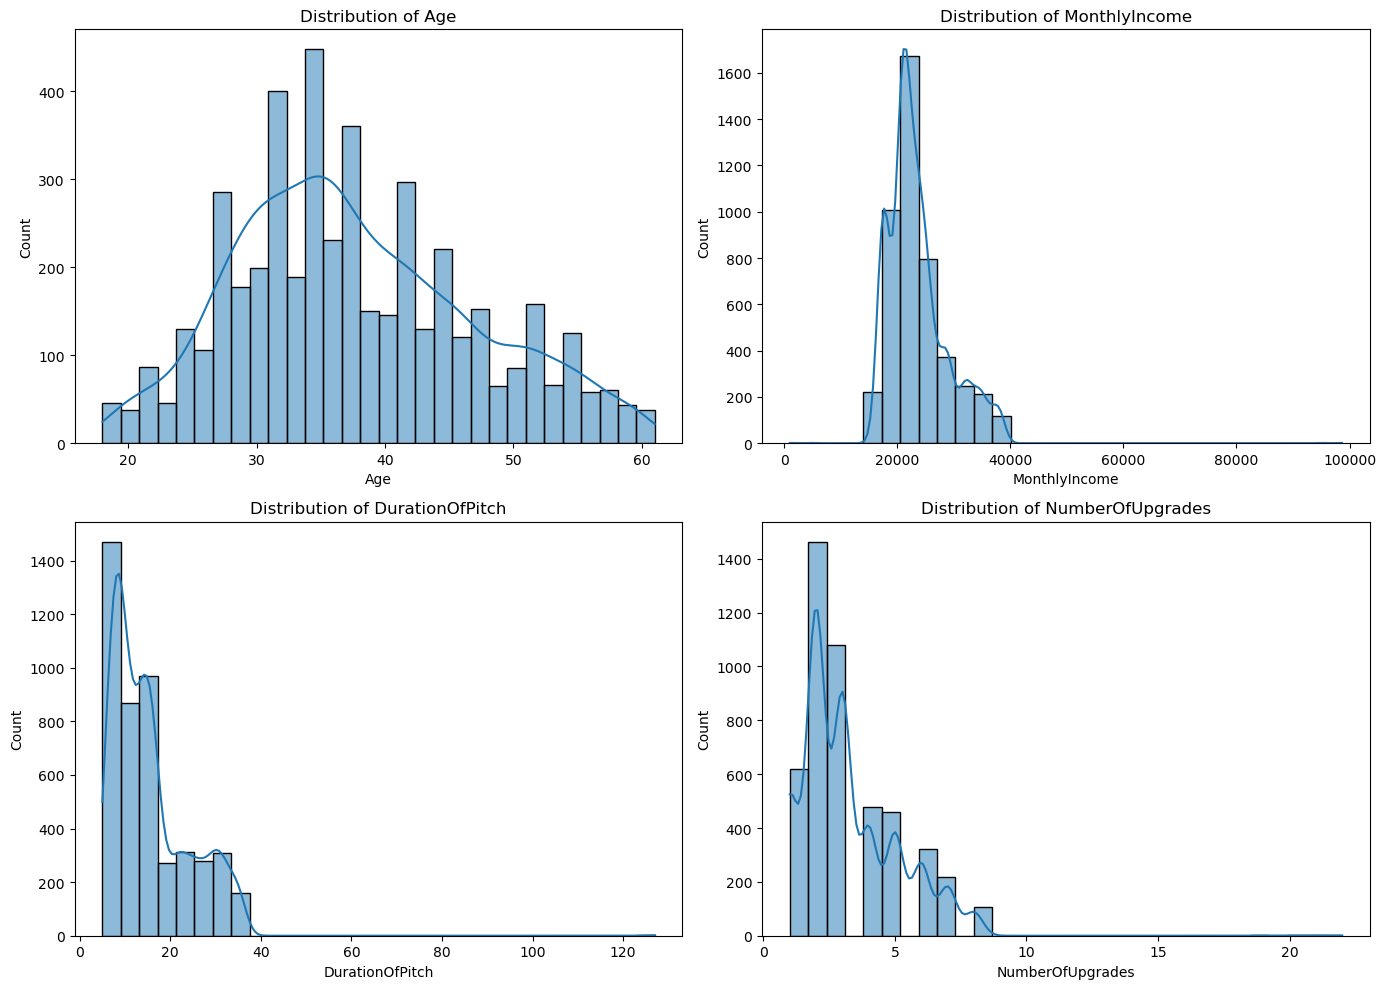

In [10]:
#Checking the distribution of the numerical variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

variables = ['Age', 'MonthlyIncome', 'DurationOfPitch', 'NumberOfUpgrades']

# Plotting the distributions
for i, var in enumerate(variables):
    sns.histplot(df[var], ax=axes[i//2, i%2], kde=True, bins=30)
    axes[i//2, i%2].set_title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

## Plotting a Pair Plot with selected columns to see the spread of data

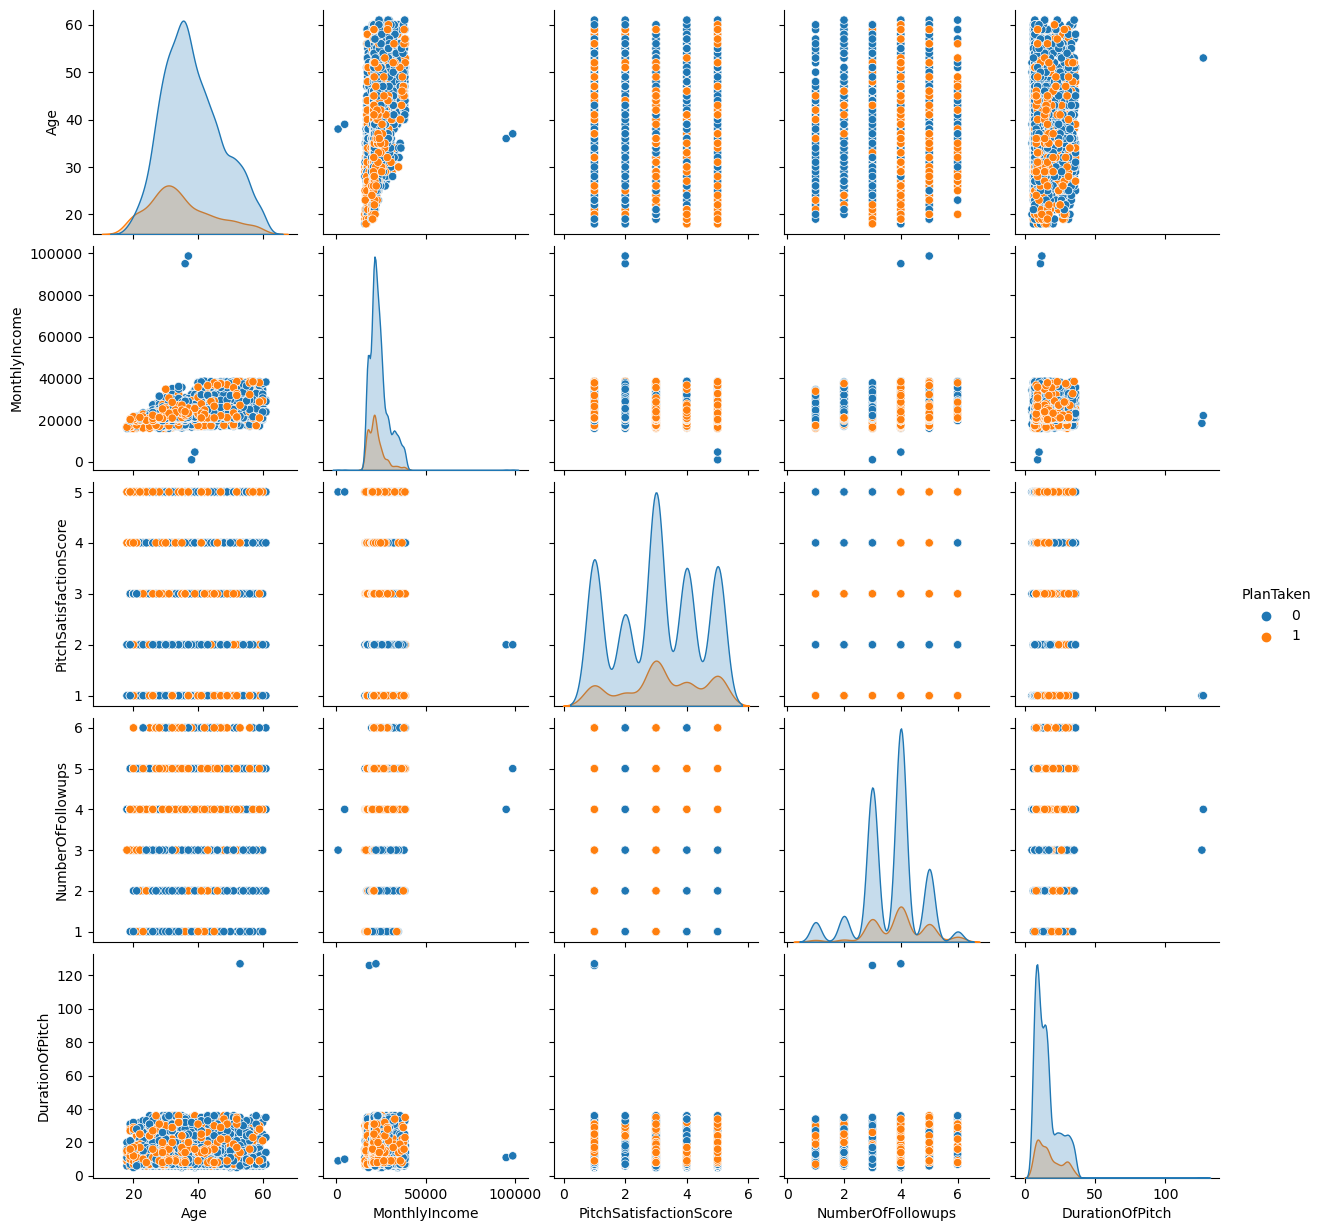

In [11]:
#generating pair plot for selected columns
Selected_columns = ['Age', 'MonthlyIncome', 'PitchSatisfactionScore', 'NumberOfFollowups', 'DurationOfPitch', 'PlanTaken']
sns.pairplot(df[Selected_columns], hue ='PlanTaken')
plt.show()

## Bivariate Analysis

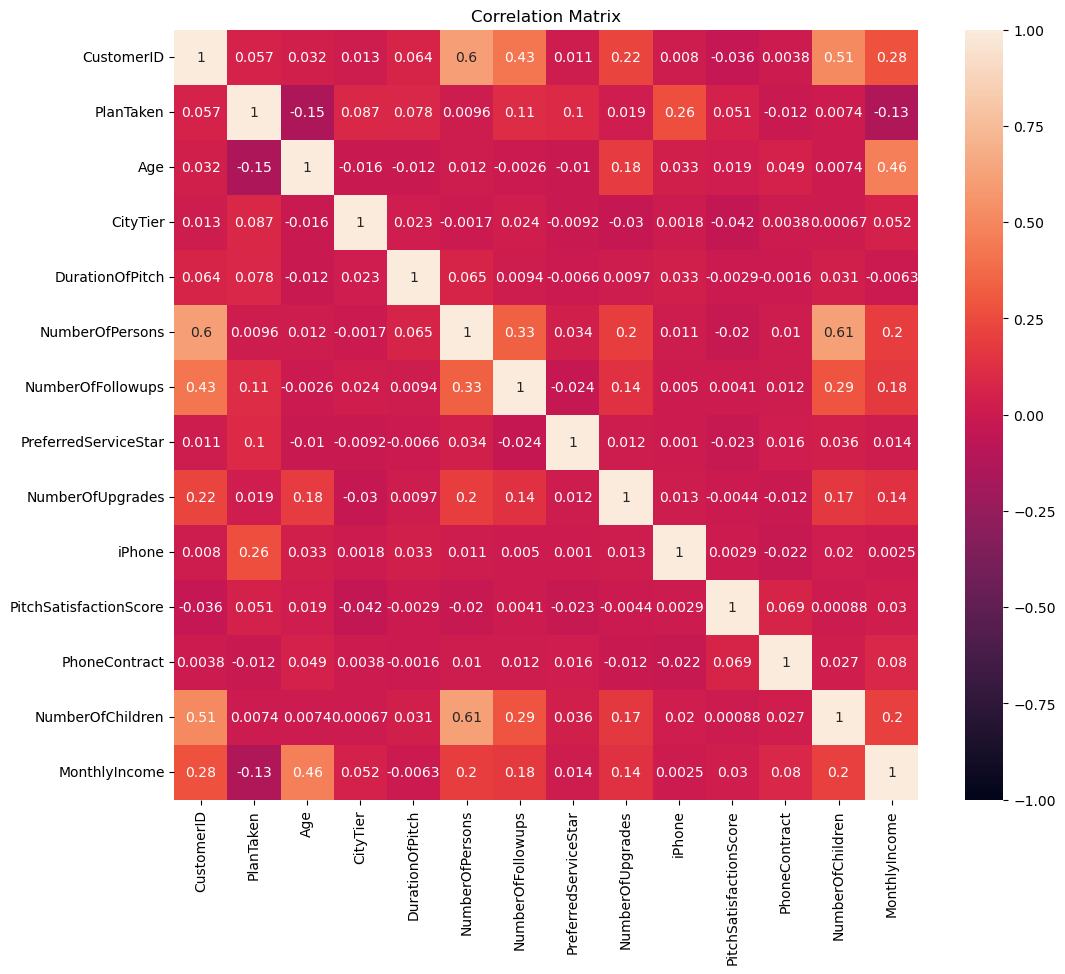

In [12]:
# Calculating the correlation matrix
corr = df.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [13]:
# replacing the fe male with female
df['Gender'] = df['Gender'].replace("Fe Male", "Female")

## Handling Missing Values 

In [14]:
numerical_columns = []
categorical_columns = []

for column in df.columns:
    unique_values = df[column].nunique()
    if unique_values >= 20:
        numerical_columns.append(column)
    else:
        categorical_columns.append(column)
print("Numerical COlumns : ", numerical_columns)
print("Categorical Columns : ", categorical_columns)

Numerical COlumns :  ['CustomerID', 'Age', 'DurationOfPitch', 'MonthlyIncome']
Categorical Columns :  ['PlanTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'NumberOfPersons', 'NumberOfFollowups', 'PlanPitched', 'PreferredServiceStar', 'MaritalStatus', 'NumberOfUpgrades', 'iPhone', 'PitchSatisfactionScore', 'PhoneContract', 'NumberOfChildren', 'Designation']


In [15]:
df[numerical_columns].isnull().sum()

CustomerID           0
Age                226
DurationOfPitch    251
MonthlyIncome      233
dtype: int64

In [16]:
numerical_columns.remove('CustomerID')

In [17]:
# Replacing the missing values with median for numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
        # Imputing with median
        df[column].fillna(df[column].median(), inplace=True)


# Replacing the missing values with mode for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
        df[column].fillna(df[column].mode()[0], inplace=True)

df.isnull().sum()

CustomerID                0
PlanTaken                 0
Age                       0
TypeofContact             0
CityTier                  0
DurationOfPitch           0
Occupation                0
Gender                    0
NumberOfPersons           0
NumberOfFollowups         0
PlanPitched               0
PreferredServiceStar      0
MaritalStatus             0
NumberOfUpgrades          0
iPhone                    0
PitchSatisfactionScore    0
PhoneContract             0
NumberOfChildren          0
Designation               0
MonthlyIncome             0
dtype: int64

## Model Building

In [18]:
# checking the numerical values
categorical_feature = [feature for feature in df.columns if df[feature].dtypes=='O']
print('The lenght of numerical features ',len(categorical_feature))
df[categorical_feature].head()

The lenght of numerical features  6


,TypeofContact,Occupation,Gender,PlanPitched,MaritalStatus,Designation
0,Self Enquiry,Salaried,Female,Deluxe,Single,Manager
1,Company Invited,Salaried,Male,Deluxe,Divorced,Manager
2,Self Enquiry,Free Lancer,Male,Basic,Single,Executive
3,Company Invited,Salaried,Female,Basic,Divorced,Executive
4,Self Enquiry,Small Business,Male,Basic,Divorced,Executive


In [19]:
# checking for unique values in planpitched column 
df['PlanPitched'].unique()

array(['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King'],
      dtype=object)

In [20]:
# dropping the customer ID column as it is not needed in modeling
df = df.drop(['CustomerID'], axis=1)

In [21]:
# applying one hot encoding
encoded_data = pd.get_dummies(df, columns = ['TypeofContact', 'Occupation', 'Gender', 'PlanPitched', 'MaritalStatus', 'Designation']) 
encoded_data

,PlanTaken,Age,CityTier,DurationOfPitch,NumberOfPersons,NumberOfFollowups,PreferredServiceStar,NumberOfUpgrades,iPhone,PitchSatisfactionScore,...,PlanPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,...,0,0,0,1,0,0,0,1,0,0
1,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,...,0,1,0,0,0,0,0,1,0,0
2,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,...,0,0,0,1,0,0,1,0,0,0
3,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,...,0,1,0,0,0,0,1,0,0,0
4,0,36.0,1,8.0,2,3.0,4.0,1.0,0,5,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,3,9.0,3,5.0,4.0,2.0,1,1,...,0,0,0,0,1,0,0,1,0,0
4884,1,28.0,1,31.0,4,5.0,3.0,3.0,1,3,...,0,0,0,1,0,0,1,0,0,0
4885,1,52.0,3,17.0,4,4.0,4.0,7.0,0,1,...,0,0,1,0,0,0,0,0,1,0
4886,1,19.0,3,16.0,3,4.0,3.0,3.0,0,5,...,0,0,0,1,0,0,1,0,0,0


## Balancing out the data

In [22]:
# balancing out the data 
df2 = encoded_data.copy()

#seprating two data frames in 0s and 1s
# here we have only 920 data points in one class so we are taking only 920 values from other class too, for balancing out the data
df_w_0 = df2[df2['PlanTaken']==0].head(920)
df_w_1 = df2[df2['PlanTaken']==1].head(920)

#combining both of them
ndf = pd.concat([df_w_0, df_w_1], ignore_index=True)

ndf

,PlanTaken,Age,CityTier,DurationOfPitch,NumberOfPersons,NumberOfFollowups,PreferredServiceStar,NumberOfUpgrades,iPhone,PitchSatisfactionScore,...,PlanPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,...,0,1,0,0,0,0,0,1,0,0
1,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,...,0,1,0,0,0,0,1,0,0,0
2,0,36.0,1,8.0,2,3.0,4.0,1.0,0,5,...,0,1,0,0,0,0,1,0,0,0
3,0,32.0,1,8.0,3,3.0,3.0,1.0,0,5,...,0,0,0,1,0,0,1,0,0,0
4,0,59.0,1,9.0,2,2.0,5.0,5.0,1,2,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,1,49.0,3,9.0,3,5.0,4.0,2.0,1,1,...,0,0,0,0,1,0,0,1,0,0
1836,1,28.0,1,31.0,4,5.0,3.0,3.0,1,3,...,0,0,0,1,0,0,1,0,0,0
1837,1,52.0,3,17.0,4,4.0,4.0,7.0,0,1,...,0,0,1,0,0,0,0,0,1,0
1838,1,19.0,3,16.0,3,4.0,3.0,3.0,0,5,...,0,0,0,1,0,0,1,0,0,0


## Train Test Split

In [23]:
# seperating the target variable from the original data
x = ndf.drop('PlanTaken', axis=1)
y = ndf['PlanTaken']

In [24]:
#Splitig the data in training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 42)

In [25]:
# Scalling the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Logistic Regression

In [26]:
# Applying logistic regression with l2 regularization
model = LogisticRegression(penalty='l2', max_iter=1000)

#Selecting different parameters to check which gives best accuracy
parameters = {
    'C':[0.001, 0.01, 0.1, 1, 4, 10],
    #To handle multionomial loss we have selected below solver
    'solver':['newton-cg', 'sag', 'saga' , 'lbfgs']
}
#Check which solver and C value gives better accuracy using grid search cv
check = GridSearchCV(estimator = model, param_grid = parameters, cv = 4)

### Finding best estimator and solver

In [27]:
#Finding best solver and estimator
check.fit(x_train, y_train)
print("The best estimator is:", check.best_estimator_)
print(' ')
print("The best parameters are:", check.best_params_)
print(' ')
print("The best f1 score is:", check.best_score_)

The best estimator is: LogisticRegression(C=4, max_iter=1000, solver='newton-cg')
 
The best parameters are: {'C': 4, 'solver': 'newton-cg'}
 
The best f1 score is: 0.8152173913043478


## Calculating and Printing Accuracy,Recall,ROC-AUC Score, Confusion Matrix

In [30]:
#printing all the values
y_out = check.best_estimator_.predict(x_test)
print('Classification report:')
print(classification_report(y_test, y_out))
print(' ')
print(f"Accuracy: {accuracy_score(y_test, y_out):.2f}")
print(' ')
print(f"Recall: {recall_score(y_test, y_out):.2f}")
print(' ')
print(f"roc-auc score: {roc_auc_score(y_test, y_out):.2f}")
print('')
print("confusion matrix:")
print(confusion_matrix(y_test, y_out))

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       187
           1       0.78      0.76      0.77       181

    accuracy                           0.77       368
   macro avg       0.77      0.77      0.77       368
weighted avg       0.77      0.77      0.77       368

 
Accuracy: 0.77
 
Recall: 0.76
 
roc-auc score: 0.77

confusion matrix:
[[148  39]
 [ 44 137]]


## Plotting Confusion Matrix

Text(0.5, 1.0, 'Confusion matrix')

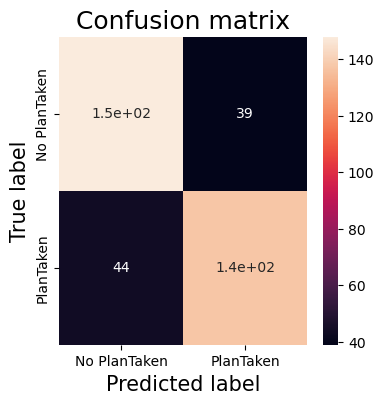

In [33]:
#Plotingt confusion matrix
plt.figure(figsize=(4, 4))
conf_matrix = sns.heatmap(confusion_matrix(y_test, y_out),  annot=True)
labels = ['No PlanTaken','PlanTaken']
conf_matrix.set_xticklabels(labels, fontsize=10)
conf_matrix.set_yticklabels(labels, fontsize=10)
conf_matrix.set_ylabel('True label', fontsize=15)
conf_matrix.set_xlabel('Predicted label', fontsize=15)
conf_matrix.set_title('Confusion matrix', fontsize = 18)

## Calculating AUC

In [34]:
# Calculating AUC curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,check.predict_proba(x_test)[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print(f"Area Under Curve:{roc_auc:.2f}")

Area Under Curve:0.84


## Plotting ROC Curve

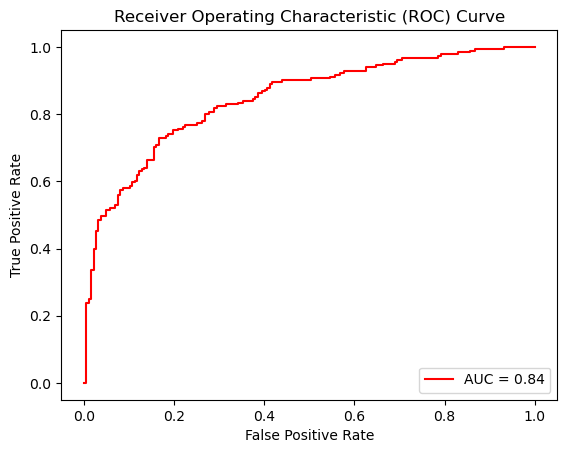

In [35]:
# Plotting the ROC Curve
plt.plot(false_positive_rate, true_positive_rate, color = 'red' ,label='AUC = {:.2f}'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Building DNN Model

In [38]:
# Build the DNN model

# Implementing He Initializer
ini1 = initializers.HeNormal()
ini2 = initializers.HeNormal()
ini3 = initializers.HeNormal()
ini4 = initializers.HeNormal()
ini5 = initializers.HeNormal()


model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], activation='relu', kernel_initializer = ini1))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_initializer = ini2))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_initializer = ini3))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_initializer = ini4))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu', kernel_initializer = ini5))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               8960      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [41]:
#compilation of model
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [42]:
#training the model
model.fit(x_train, y_train, epochs=12 , batch_size= 250)

Epoch 1/12


6/6 [==============================] - 1s 6ms/step - loss: 0.9724 - accuracy: 0.5231
Epoch 2/12
6/6 [==============================] - 0s 6ms/step - loss: 0.8033 - accuracy: 0.5272
Epoch 3/12
6/6 [==============================] - 0s 5ms/step - loss: 0.7309 - accuracy: 0.5401
Epoch 4/12
6/6 [==============================] - 0s 6ms/step - loss: 0.7002 - accuracy: 0.5686
Epoch 5/12
6/6 [==============================] - 0s 5ms/step - loss: 0.6631 - accuracy: 0.6005
Epoch 6/12
6/6 [==============================] - 0s 6ms/step - loss: 0.6534 - accuracy: 0.6094
Epoch 7/12
6/6 [==============================] - 0s 5ms/step - loss: 0.6391 - accuracy: 0.6284
Epoch 8/12
6/6 [==============================] - 0s 6ms/step - loss: 0.6116 - accuracy: 0.6542
Epoch 9/12
6/6 [==============================] - 0s 6ms/step - loss: 0.5903 - accuracy: 0.6692
Epoch 10/12
6/6 [==============================] - 0s 5ms/step - loss: 0.5800 - accuracy: 0.6895
Epoch 11/12
6/6 [====================

In [43]:
# prediction and Accuracy scores
y_tn_pb = model.predict(x_train)
y_tn_pd = (y_tn_pb > 0.5).astype(int)

# Calculating accuracy on the training set
acr = accuracy_score(y_train, y_tn_pd)

# Prin accuracy on the training set
print(f"Accuracy on the training set: {acr}")

46/46 [==============================] - 0s 2ms/step
Accuracy on the training set: 0.8131793478260869


In [44]:
#checking the accuracy of model on test set
y_pred = (model.predict(x_test) > 0.5).astype(int)
#calculating the accuracy on test set
acr = accuracy_score(y_test, y_pred)
# printing the accuracy on test set
print(f"Accuracy on the test set: {acr}")

12/12 [==============================] - 0s 1ms/step
Accuracy on the test set: 0.7336956521739131


## Classification Report

In [45]:
# Generating classification report
print('Classification report:')
print(classification_report(y_test, y_pred))
print(' ')
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(' ')
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(' ')
print(f"roc-auc score: {roc_auc_score(y_test, y_pred):.2f}")
print('')
print("confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       187
           1       0.72      0.74      0.73       181

    accuracy                           0.73       368
   macro avg       0.73      0.73      0.73       368
weighted avg       0.73      0.73      0.73       368

 
Accuracy: 0.73
 
Recall: 0.74
 
roc-auc score: 0.73

confusion matrix:
[[136  51]
 [ 47 134]]


## AUC Curve

In [46]:
# Calculating AUC on the testing set
auc_test = roc_auc_score(y_test, y_pred)


# Print AUC and the testing set
print(f"AUC on the testing set: {auc_test}")

AUC on the testing set: 0.7338021094927172


## ROC Curve

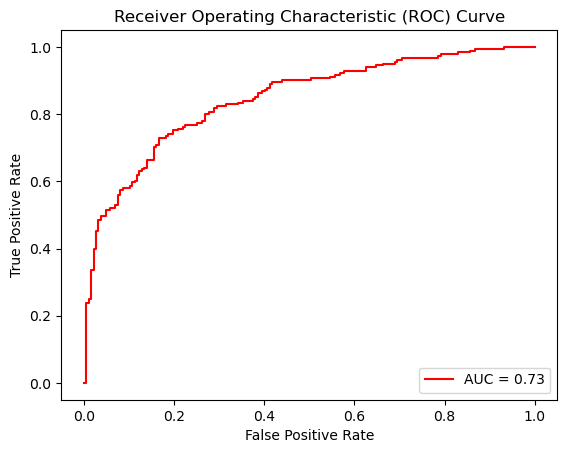

In [48]:
# Plotting the ROC Curve
plt.plot(false_positive_rate, true_positive_rate, color = 'red' ,label='AUC = {:.2f}'.format(auc_test))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()